# TRABAJO PRÁCTICO INTEGRADOR N°1

## Sistema de Análisis de Documentos Digitalizados

---

**Información del Estudiante:**
- **Nombre y Apellido:** Kevin Miyashiro
- **Fecha de Entrega:** 24 de Septiembre de 2025
- **Materia:** Procesamiento de Imágenes - IFTS24

---

### Objetivo

Desarrollar un sistema básico de análisis automático de documentos digitalizados que integre las técnicas de procesamiento de imágenes estudiadas en el curso.

### Estructura del Trabajo

| Parte | Descripción | Peso |
|-------|-------------|------|
| **1** | Fundamentos Teóricos | 20% |
| **2** | Setup del Entorno | 15% |
| **3** | Análisis de Imágenes | 35% |
| **4** | Preprocessing Básico | 30% |

**Dataset requerido:** 3 imágenes de documentos con diferentes características (buena calidad, rotada, con problemas de iluminación)

---

# PARTE 1: Fundamentos Teóricos

## ¿Por qué Cuadernos Interactivos para IA y Ciencias de Datos?

### Diferencias Metodológicas Fundamentales

El trabajo en inteligencia artificial y ciencias de datos requiere un enfoque metodológico diferente al desarrollo de software tradicional. Mientras que la programación tradicional sigue un flujo lineal y predecible, el trabajo con datos es inherentemente iterativo y exploratorio.

**Programación Tradicional:**
```
Requisitos → Diseño → Implementación → Testing → Producto
```

**Investigación en IA/Datos:**
```
Hipótesis ⟷ Experimento ⟷ Análisis ⟷ Refinamiento ⟷ Nueva Hipótesis
```

### Ventajas de los Cuadernos Interactivos

1. **Narrativa Científica:** Permiten documentar el proceso de pensamiento, no solo el resultado final
2. **Iteración Rápida:** Ejecutar y modificar secciones específicas sin reejecutar todo el programa
3. **Visualización Inmediata:** Ver resultados inmediatamente después de cada paso
4. **Comunicación Efectiva:** Stakeholders no técnicos pueden seguir el proceso y entender decisiones
5. **Reproducibilidad:** Otros investigadores pueden replicar exactamente los experimentos

### Casos de Uso en la Industria

- **Google Research:** Publica papers con cuadernos que permiten reproducir experimentos
- **Netflix:** Usa cuadernos para análisis de datos de usuarios y recomendaciones
- **Uber:** Análisis de patrones de viajes y optimización de rutas
- **Kaggle:** Plataforma completa basada en cuadernos para competencias de machine learning

### Cuándo Usar Cada Herramienta

**Usar Cuadernos para:**
- Análisis exploratorio de datos
- Experimentación y prototipado
- Comunicación de resultados
- Educación y documentación

**Usar Scripts para:**
- Sistemas en producción
- Automatización de tareas repetitivas
- APIs y servicios web
- Pipelines de datos automatizados

En este trabajo práctico, usaremos cuadernos porque estamos en la fase de investigación y experimentación, donde necesitamos entender los datos, probar diferentes enfoques y documentar nuestros hallazgos.

---

# Setup del Entorno

En esta sección vas a configurar tu entorno de trabajo de manera profesional. Un setup bien hecho te ahorra tiempo y errores durante todo el proyecto.

**Material de consulta:** `Utilidades_y_Plantillas.ipynb`

## Importaciones Básicas

Importá las librerías necesarias para procesamiento de imágenes y visualización:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image, ImageEnhance
import cv2
from skimage import color, filters, morphology, exposure, transform

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import os, glob, warnings
warnings.filterwarnings('ignore')

from google.colab import files

plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
np.random.seed(42)


In [ ]:
## Funciones Utilitarias
def cargar_imagen(ruta):
    """Carga una imagen y la convierte a RGB."""
    try:
        # Usar PIL para mayor compatibilidad
        imagen_pil = Image.open(ruta)
        imagen = np.array(imagen_pil)

        # Si la imagen es en escala de grises, convertir a RGB
        if len(imagen.shape) == 2:
            imagen = np.stack([imagen] * 3, axis=-1)

        # Si tiene canal alpha, removerlo
        if imagen.shape[2] == 4:
            imagen = imagen[:, :, :3]

        return imagen
    except Exception as e:
        print(f"❌ Error al cargar la imagen {ruta}: {e}")
        return None

def mostrar_info_imagen(imagen, titulo="Imagen"):
    """Muestra información básica de la imagen."""
    if imagen is None:
        print("❌ La imagen es None")
        return

    print(f"📊 Información de '{titulo}':")
    print(f"   Dimensiones: {imagen.shape}")
    print(f"   Tipo de datos: {imagen.dtype}")
    print(f"   Rango de valores: [{imagen.min()}, {imagen.max()}]")

    plt.figure(figsize=(10, 8))
    plt.imshow(imagen)
    plt.title(titulo)
    plt.axis('off')
    plt.show()


---

# Análisis de Tu Dataset

Ahora vas a trabajar con tu dataset de 3 documentos. Esta parte es clave para entender qué problemas tenés que resolver.

**Preparación del Dataset:**
- Creá una carpeta llamada `dataset/` en la misma ubicación que este notebook
- Incluí exactamente 3 imágenes de documentos:
  1. Una de buena calidad (bien iluminada, recta)
  2. Una rotada o inclinada
  3. Una con problemas (oscura, borrosa, o con sombras)

## Carga de las Imágenes

**Material de consulta:** `002/TEO/LeerImagenColor.ipynb`

In [ ]:
# Define las rutas a tus 3 imágenes
rutas_imagenes = [
    "dataset/imagen1.jpg",  # Buena calidad
    "dataset/imagen2.jpg",  # Rotada
    "dataset/imagen3.jpg"   # Con problemas
]

# Carga las 3 imágenes usando tu función
imagenes = []
nombres = ["Buena Calidad", "Rotada", "Con Problemas"]

# Tu código aquí

# Definir la ruta a las imágenes extraídas
images_path = '/content/dataset/'

# Obtener una lista de todos los archivos de imagen .jpg
image_files = [f for f in os.listdir(images_path) if f.endswith('.jpg')]

# Definir los límites de color para la segmentación (ajustar según sea necesario)
# Ejemplo para un color brillante genérico
lower_bound = np.array([0, 50, 50])
upper_bound = np.array([180, 255, 255])

# Crear directorios para guardar resultados si es necesario (opcional)
# output_mask_path = '/content/segmented_masks/'
# output_contour_path = '/content/images_with_contours/'
# os.makedirs(output_mask_path, exist_ok=True)
# os.makedirs(output_contour_path, exist_ok=True)

# Lista para almacenar los datos de contorno de todas las imágenes
contour_data = []

print(f"Se encontraron {len(image_files)} archivos de imagen.")


Se encontraron 3 archivos de imagen.


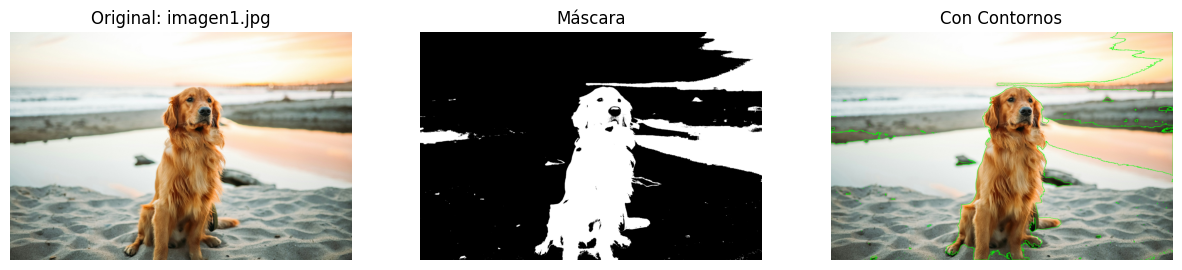

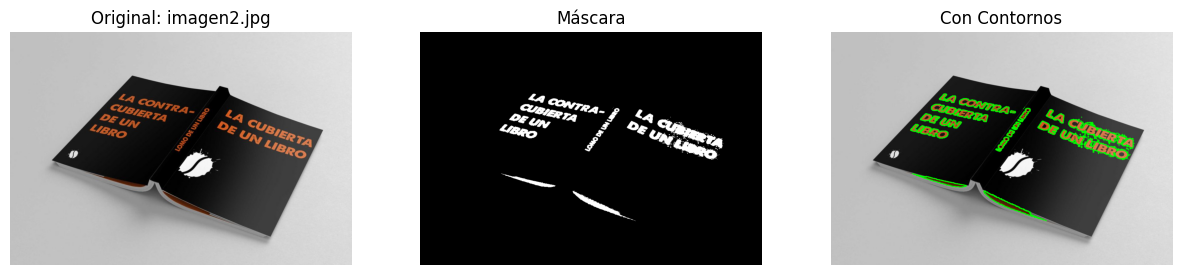

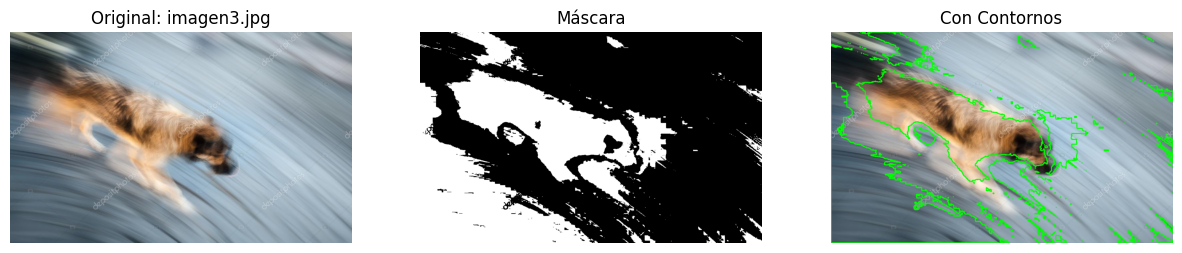

Procesamiento de todas las imágenes finalizado.


In [ ]:
# Procesar cada imagen
for i, image_file in enumerate(image_files):
    image_path = os.path.join(images_path, image_file)

    try:
        # Cargar la imagen usando Pillow
        img = Image.open(image_path)

        # Convertir la imagen de PIL a formato OpenCV (BGR)
        # OpenCV usa formato BGR, mientras que PIL usa RGB
        img_cv = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

        # Convertir la imagen al espacio de color HSV
        hsv_img = cv2.cvtColor(img_cv, cv2.COLOR_BGR2HSV)

        # Crear una máscara binaria usando la función inRange
        mask = cv2.inRange(hsv_img, lower_bound, upper_bound)

        # Encontrar contornos en la máscara binaria
        # Crear una copia de la máscara ya que findContours modifica la entrada
        mask_copy = mask.copy()
        contours, _ = cv2.findContours(mask_copy, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Dibujar contornos en la imagen original
        image_with_contours = img_cv.copy()
        # Dibujar todos los contornos en verde con grosor 2
        cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)

        # Mostrar resultados para algunas imágenes (opcional, para evitar demasiados gráficos)
        if i < 5: # Mostrar resultados para las primeras 5 imágenes
            plt.figure(figsize=(15, 5))

            plt.subplot(1, 3, 1)
            plt.imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))
            plt.title(f"Original: {image_file}")
            plt.axis('off')

            plt.subplot(1, 3, 2)
            plt.imshow(mask, cmap='gray')
            plt.title("Máscara")
            plt.axis('off')

            plt.subplot(1, 3, 3)
            plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
            plt.title("Con Contornos")
            plt.axis('off')

            plt.show()

        # También puedes guardar los resultados (descomenta las líneas de abajo si creaste directorios de salida)
        # cv2.imwrite(os.path.join(output_mask_path, f"mask_{image_file}"), mask)
        # cv2.imwrite(os.path.join(output_contour_path, f"contour_{image_file}"), image_with_contours)

        # Procesar datos de contorno (ej. almacenar área, perímetro, etc.)
        for j, contour in enumerate(contours):
            area = cv2.contourArea(contour)
            perimeter = cv2.arcLength(contour, True)
            # Agregar los datos de contorno a la lista
            contour_data.append({'image': image_file, 'contour_id': j, 'area': area, 'perimeter': perimeter})
            # print(f"  {image_file} - Contorno {j+1}: Área = {area:.2f}, Perímetro = {perimeter:.2f}") # Opcional: imprimir detalles

    except FileNotFoundError:
        print(f"Error: Archivo de imagen no encontrado en {image_path}")
    except Exception as e:
        print(f"Ocurrió un error al procesar {image_file}: {e}")

print("Procesamiento de todas las imágenes finalizado.")

In [ ]:

# Analizar los datos de contorno recopilados
if contour_data: # Verificar si la lista de datos de contorno no está vacía
    df_contour_data = pd.DataFrame(contour_data)
    print("\nPrimeras 5 filas de los datos de contorno:")
    display(df_contour_data.head(5))

    # Corregir la advertencia de sintaxis aquí
    print("\nEstadísticas descriptivas del área y perímetro de los contornos:")
    display(df_contour_data[['area', 'perimeter']].describe())


Primeras 5 filas de los datos de contorno:


image  contour_id  area  perimeter
0  imagen1.jpg           0   0.0        0.0
1  imagen1.jpg           1   0.0        2.0
2  imagen1.jpg           2   0.0        4.0
3  imagen1.jpg           3   0.0        2.0
4  imagen1.jpg           4   0.0        2.0


Estadísticas descriptivas del área y perímetro de los contornos:


area     perimeter
count  9.930000e+02    993.000000
mean   1.735761e+03     47.396033
std    3.906012e+04    472.320451
min    0.000000e+00      0.000000
25%    0.000000e+00      0.000000
50%    0.000000e+00      4.000000
75%    3.000000e+00     10.828427
max    1.201686e+06  12545.293617

## Inspección Visual y Análisis

**Material de consulta:** `002/Fundamentos_Imagen_Digital.ipynb`

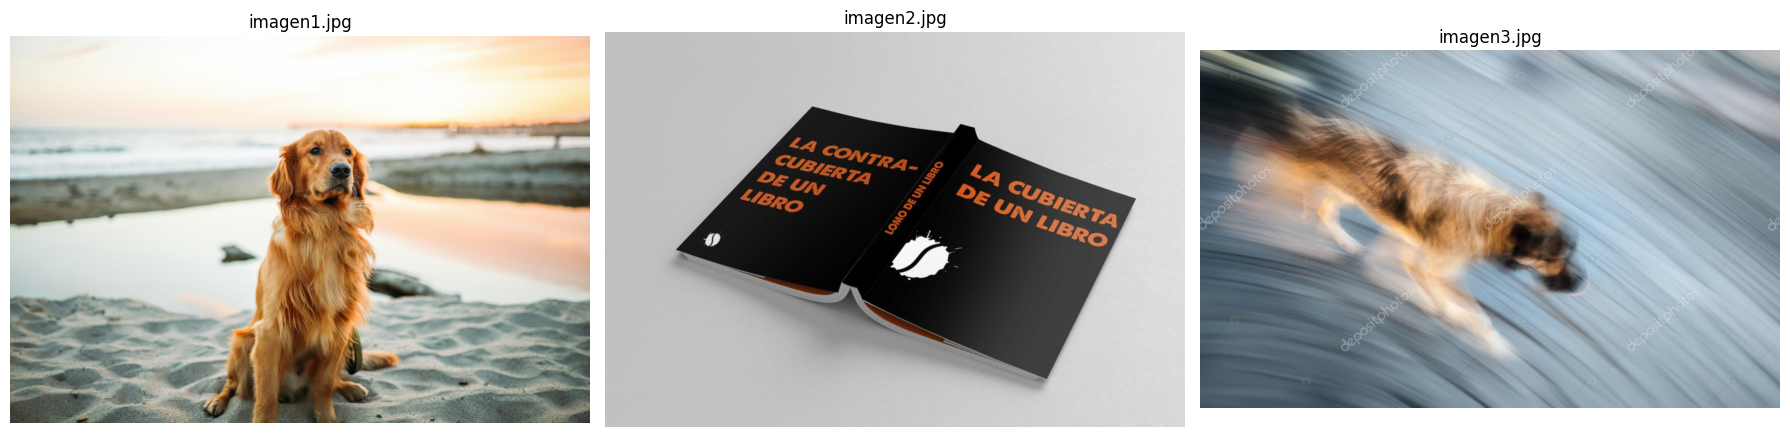

In [ ]:
# Mostra las 3 imágenes lado a lado con sus nombres
# Usa subplots de matplotlib

# Tu código aquí
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, image_file in enumerate(image_files[:3]):  # Solo las primeras 3
    image_path = os.path.join(images_path, image_file)

    # Cargar imagen con PIL
    img = Image.open(image_path)

    # Mostrar en subplot
    axs[i].imshow(img)
    axs[i].set_title(image_file, fontsize=12)
    axs[i].axis("off")

plt.tight_layout()
plt.show()



📂 Imagen: imagen1.jpg
- Tamaño (ancho, alto): (3000, 2000)
- Modo de color: RGB
- Intensidad mínima: 1
- Intensidad máxima: 255
- Intensidad media: 182.63
- Desviación estándar: 59.99


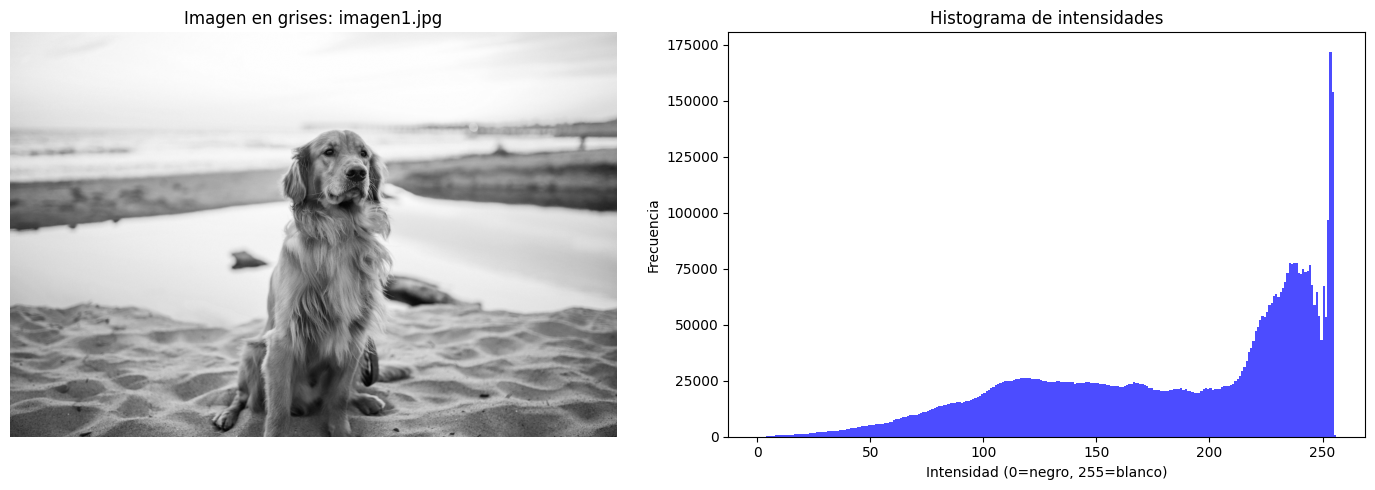


📂 Imagen: imagen2.jpg
- Tamaño (ancho, alto): (1024, 698)
- Modo de color: RGB
- Intensidad mínima: 0
- Intensidad máxima: 255
- Intensidad media: 150.53
- Desviación estándar: 78.92


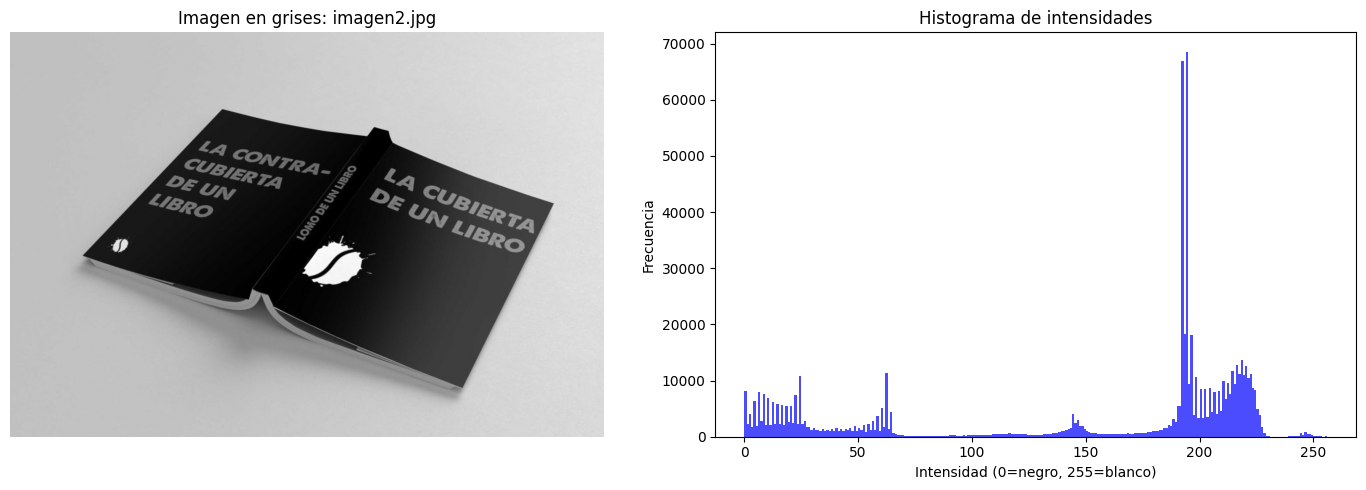


📂 Imagen: imagen3.jpg
- Tamaño (ancho, alto): (1023, 631)
- Modo de color: RGB
- Intensidad mínima: 4
- Intensidad máxima: 245
- Intensidad media: 150.05
- Desviación estándar: 43.52


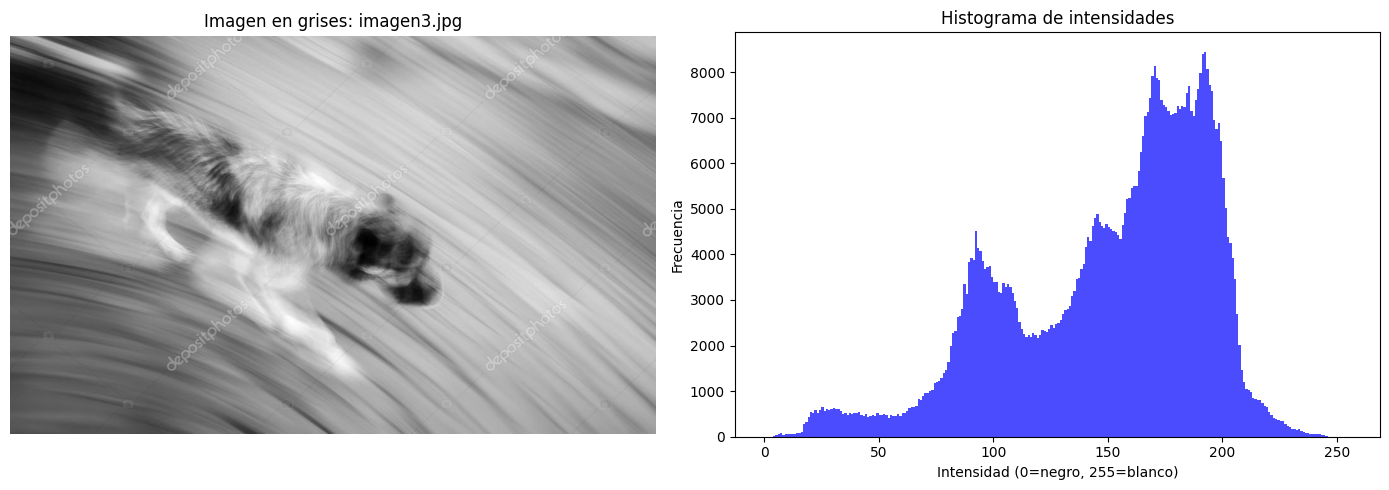

In [ ]:
# Para cada imagen, mostrá información básica y un histograma
# Esto te ayuda a entender los problemas de cada una

# Tu código aquí

# Analizar cada imagen: información básica + histograma
for i, image_file in enumerate(image_files[:3]):  # Solo 3 imágenes
    image_path = os.path.join(images_path, image_file)

    # Cargar imagen con PIL
    img = Image.open(image_path)
    img_gray = img.convert("L")  # Convertir a escala de grises

    # Convertir a numpy para cálculos
    img_np = np.array(img_gray)

    # Información básica
    print(f"\n📂 Imagen: {image_file}")
    print(f"- Tamaño (ancho, alto): {img.size}")
    print(f"- Modo de color: {img.mode}")
    print(f"- Intensidad mínima: {img_np.min()}")
    print(f"- Intensidad máxima: {img_np.max()}")
    print(f"- Intensidad media: {img_np.mean():.2f}")
    print(f"- Desviación estándar: {img_np.std():.2f}")

    # Visualización
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # Imagen original (escala de grises para analizar mejor)
    axs[0].imshow(img_gray, cmap="gray")
    axs[0].set_title(f"Imagen en grises: {image_file}")
    axs[0].axis("off")

    # Histograma de intensidades
    axs[1].hist(img_np.ravel(), bins=256, range=[0,256], color='blue', alpha=0.7)
    axs[1].set_title("Histograma de intensidades")
    axs[1].set_xlabel("Intensidad (0=negro, 255=blanco)")
    axs[1].set_ylabel("Frecuencia")

    plt.tight_layout()
    plt.show()


## Identificación de Problemas

Basándote en tu inspección visual, identificá los problemas principales de cada imagen:

Imagen 1 (Buena Calidad)

Problemas identificados: Ninguno significativo. Contraste y nitidez aceptables.

Preprocessing necesario: No se requiere


Imagen 2 (Rotada)

Problemas identificados: Afecta legibilidad al leer por su inclinacion

Preprocessing necesario: Aplicamos un cambio de perspectiva teniendo en cuenta las coordenadas en cada esquina de la imagen (A ojo)

Imagen 3 (Borroso / Oscuro / Sombras)

Problemas identificados: Poca nitidez, imagen borrosa. Bajo contraste entre imagen y fondo.

Preprocessing necesario: Conversión a grises. Filtros de reducción de ruido y sharpening (mejorar nitidez). Ecualización adaptativa del histograma (CLAHE).
Corrección de iluminación.

---

# Preprocessing Básico

Ahora vas a aplicar técnicas de preprocessing para mejorar cada imagen. Trabajá con una imagen por vez.

## Segmentación Básica

Separar el documento del fondo es el primer paso crítico.

**Material de consulta:** `Segmentacion.ipynb` (especialmente las funciones de umbralización)

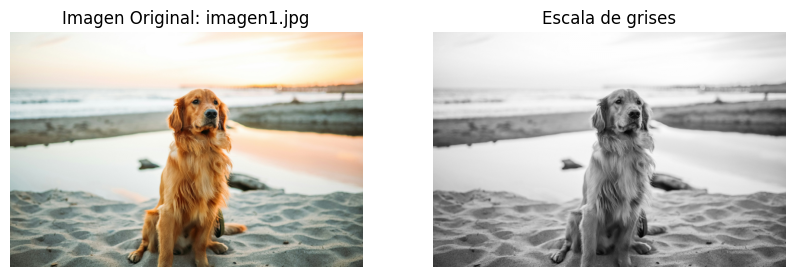

Procesada la imagen: imagen1.jpg
- Tamaño: (2000, 3000)
- Intensidad mínima: 1
- Intensidad máxima: 255


In [ ]:
# Elegí UNA de tus imágenes para trabajar primero
#imagen_trabajo = imagenes[0]  # Cambiá el índice según necesites

# Convertí a escala de grises
# Tu código aquí
# =========================================
# 4.1 Segmentación Básica - Conversión a Escala de Grises
# =========================================

# Seleccionar una imagen de ejemplo (podés cambiar el índice: 0, 1 o 2)
image_index = 0
image_file = image_files[image_index]
image_path = os.path.join(images_path, image_file)

# Cargar imagen con PIL
img1 = Image.open(image_path)

# Convertir a escala de grises con PIL
img_gray_pil = img1.convert("L")

# Convertir también a NumPy (útil para OpenCV)
img_gray = np.array(img_gray_pil)

# Mostrar resultados
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img1)
plt.title(f"Imagen Original: {image_file}")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_gray, cmap="gray")
plt.title("Escala de grises")
plt.axis("off")

plt.show()

print(f"Procesada la imagen: {image_file}")
print(f"- Tamaño: {img_gray.shape}")
print(f"- Intensidad mínima: {img_gray.min()}")
print(f"- Intensidad máxima: {img_gray.max()}")

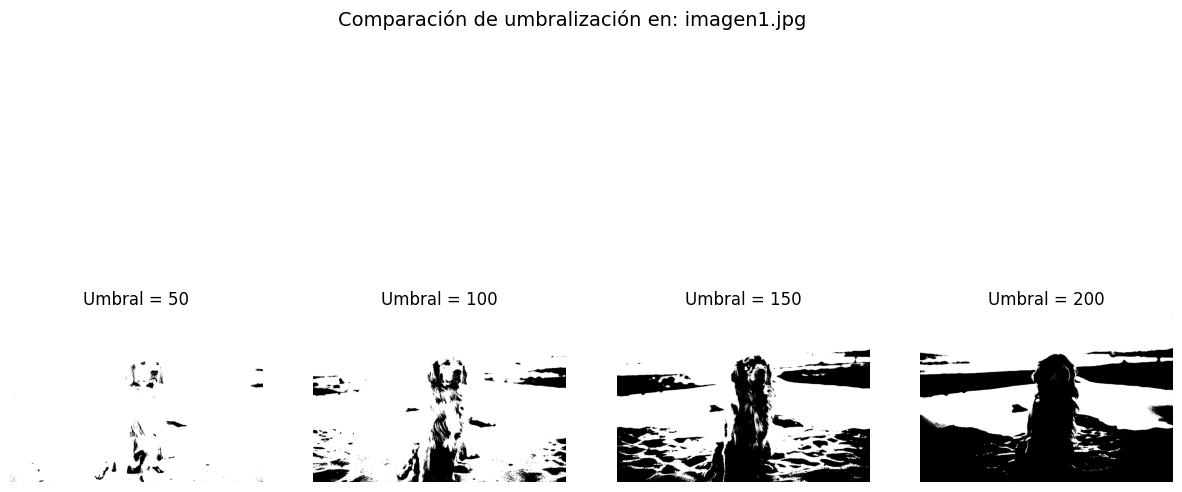

In [ ]:
# Aplicá segmentación por umbralización
# Probá diferentes valores hasta encontrar el mejor

# Tu código aquí
# Usamos la imagen en escala de grises del paso anterior (img_gray)
threshold_values = [50, 100, 150, 200]  # Valores de ejemplo
binarized_images = []

plt.figure(figsize=(15, 8))

for i, t in enumerate(threshold_values):
    # Aplicar umbralización fija
    _, binary = cv2.threshold(img_gray, t, 255, cv2.THRESH_BINARY)
    binarized_images.append(binary)

    # Mostrar resultado
    plt.subplot(1, len(threshold_values), i+1)
    plt.imshow(binary, cmap="gray")
    plt.title(f"Umbral = {t}")
    plt.axis("off")

plt.suptitle(f"Comparación de umbralización en: {image_file}", fontsize=14)
plt.show()

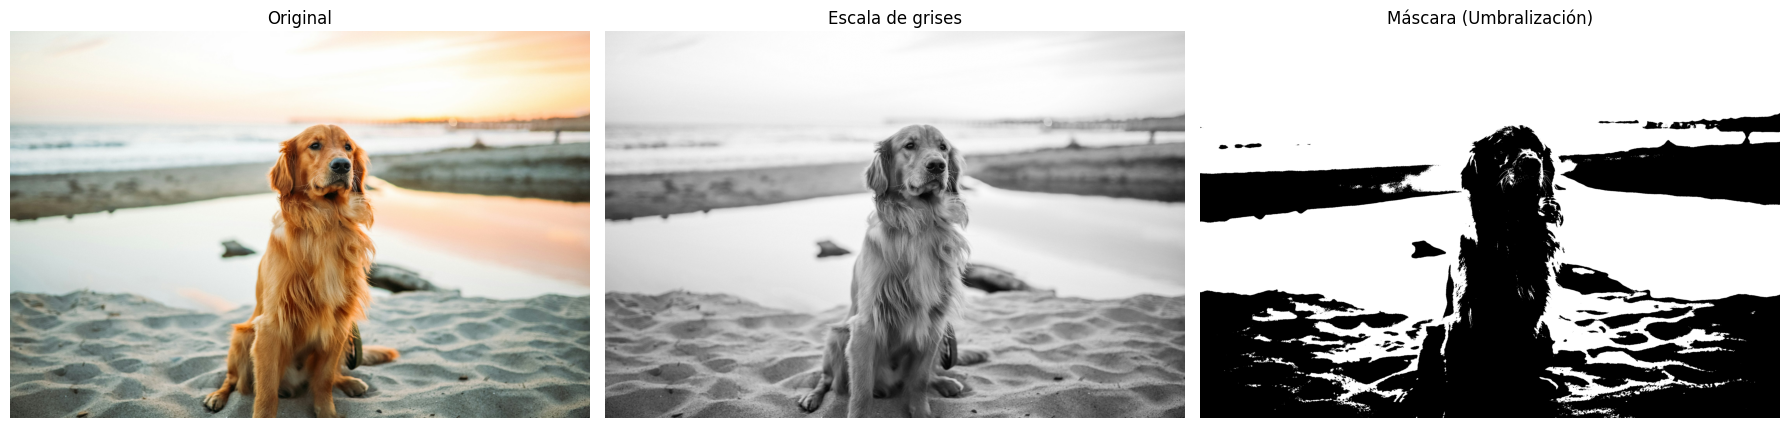

In [ ]:
# Mostrá el resultado: original, escala de grises, y máscara
# Tu código aquí
_, mask = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(18,6))

# Imagen original
plt.subplot(1,3,1)
plt.imshow(img1)
plt.title("Original")
plt.axis("off")

# Escala de grises
plt.subplot(1,3,2)
plt.imshow(img_gray, cmap="gray")
plt.title("Escala de grises")
plt.axis("off")

# Máscara binaria (segmentación)
plt.subplot(1,3,3)
plt.imshow(mask, cmap="gray")
plt.title("Máscara (Umbralización)")
plt.axis("off")

plt.tight_layout()
plt.show()

## Mejora de Calidad con imagen Borrosa

**Material de consulta:** `Mejora_Imagen_Ecualizacion.ipynb`

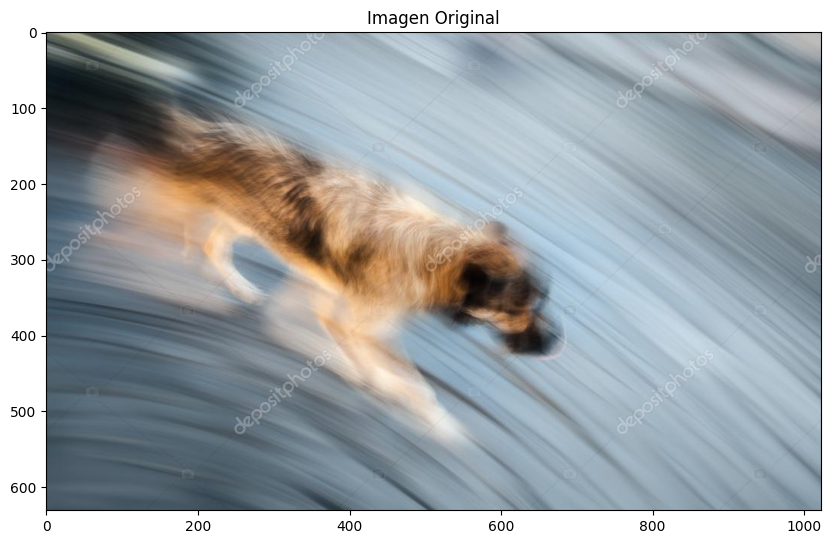

In [ ]:
I = cv2.imread('/content/dataset/imagen3.jpg')  # Cargar la imagen
plt.figure(figsize=(10, 12))  # Tamaño de la figura
plt.imshow(cv2.cvtColor(I, cv2.COLOR_BGR2RGB))  # Mostrar la imagen en formato RGB
plt.title('Imagen Original')  # Título de la imagen
plt.show()  # Mostrar la figura

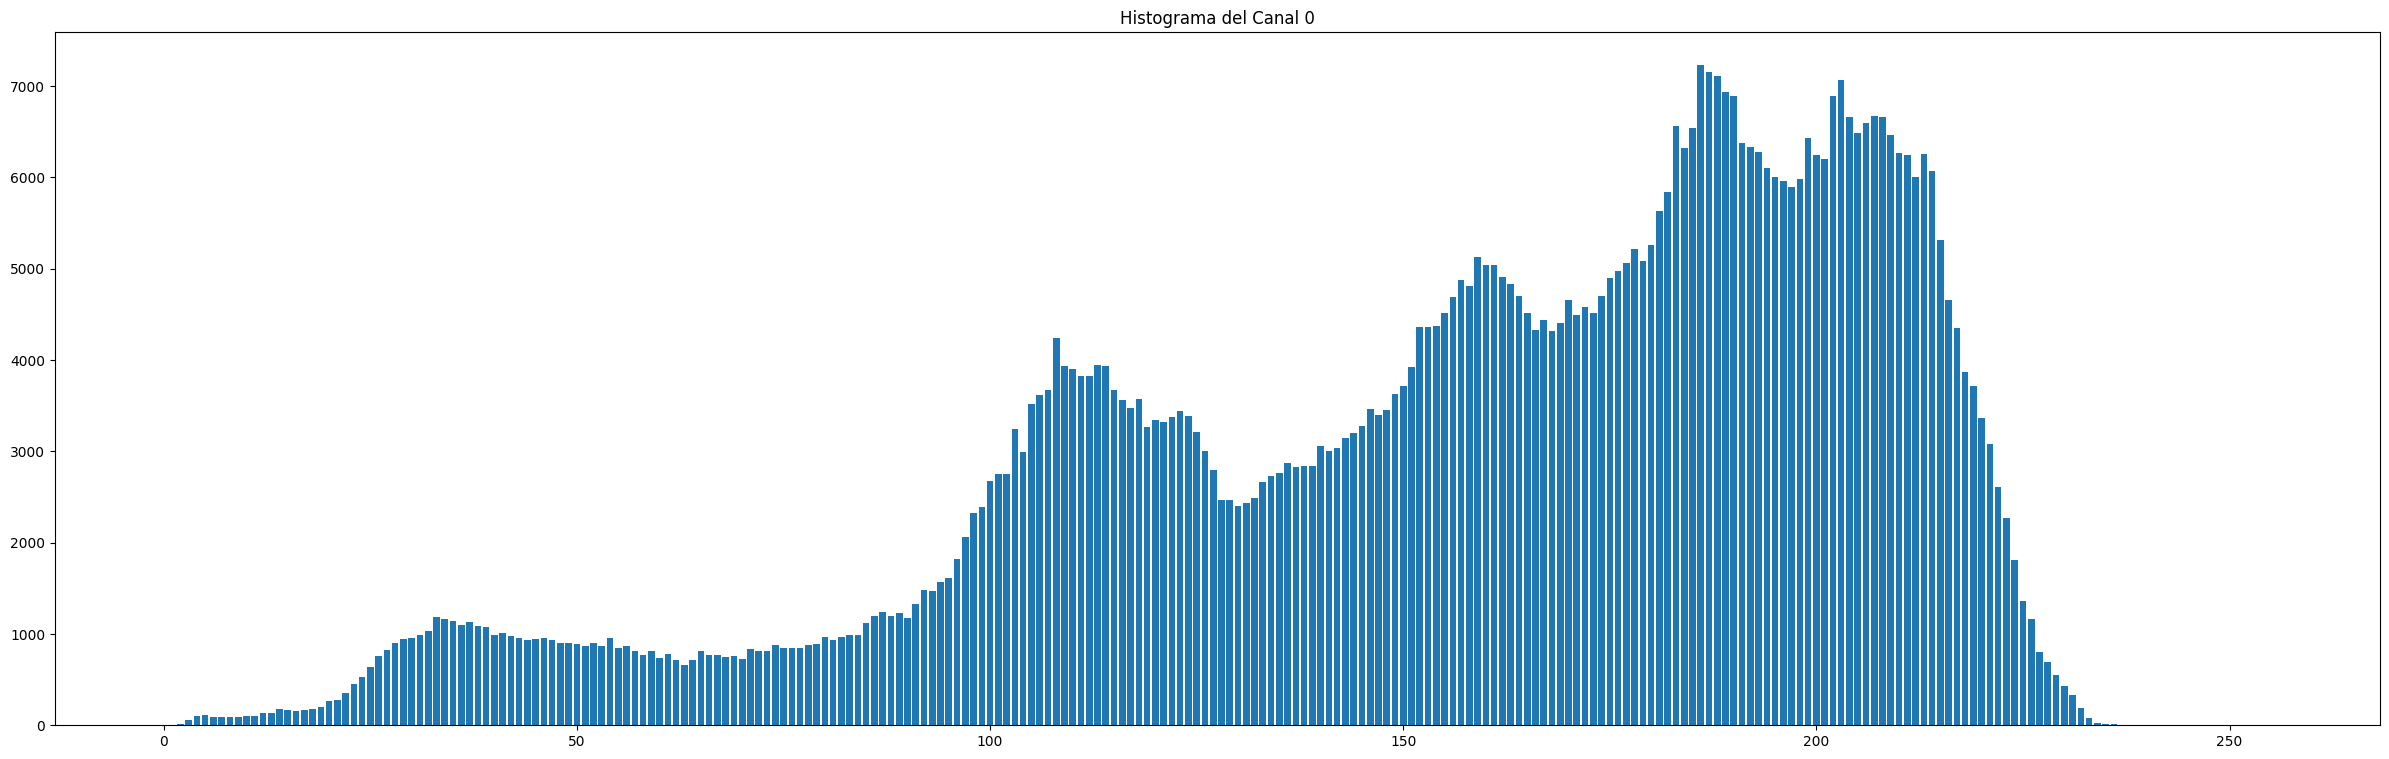

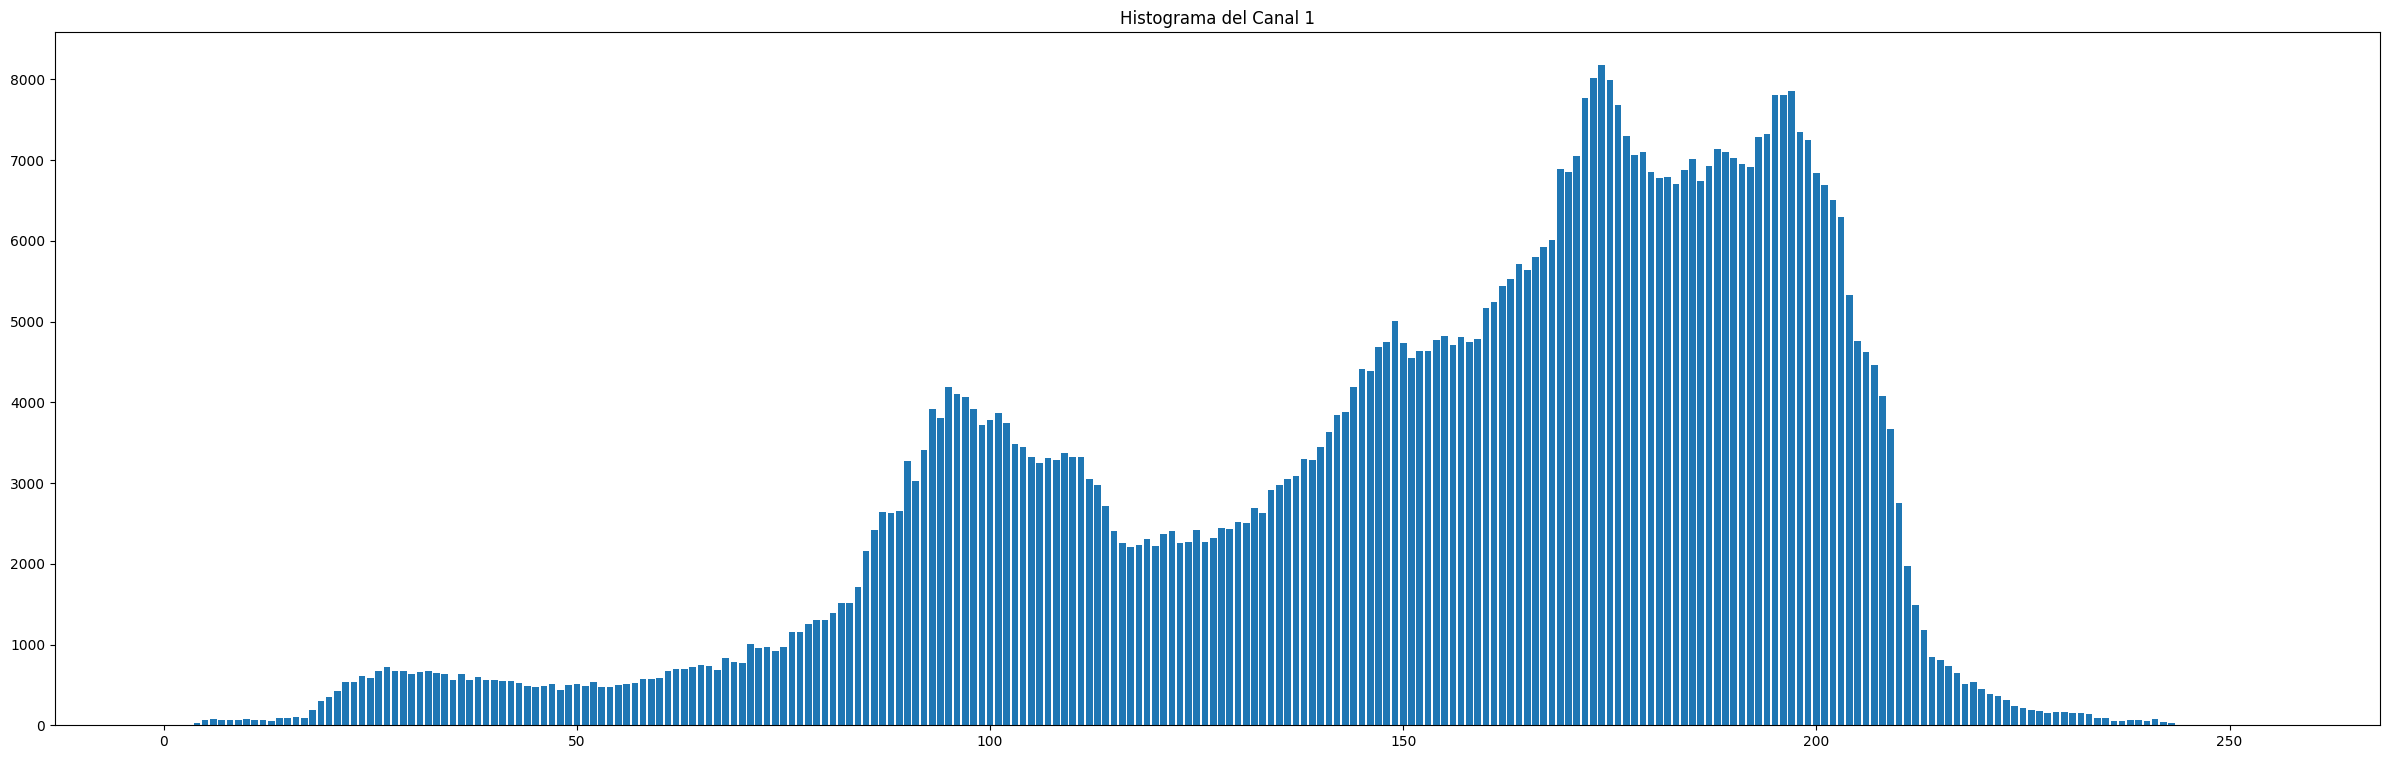

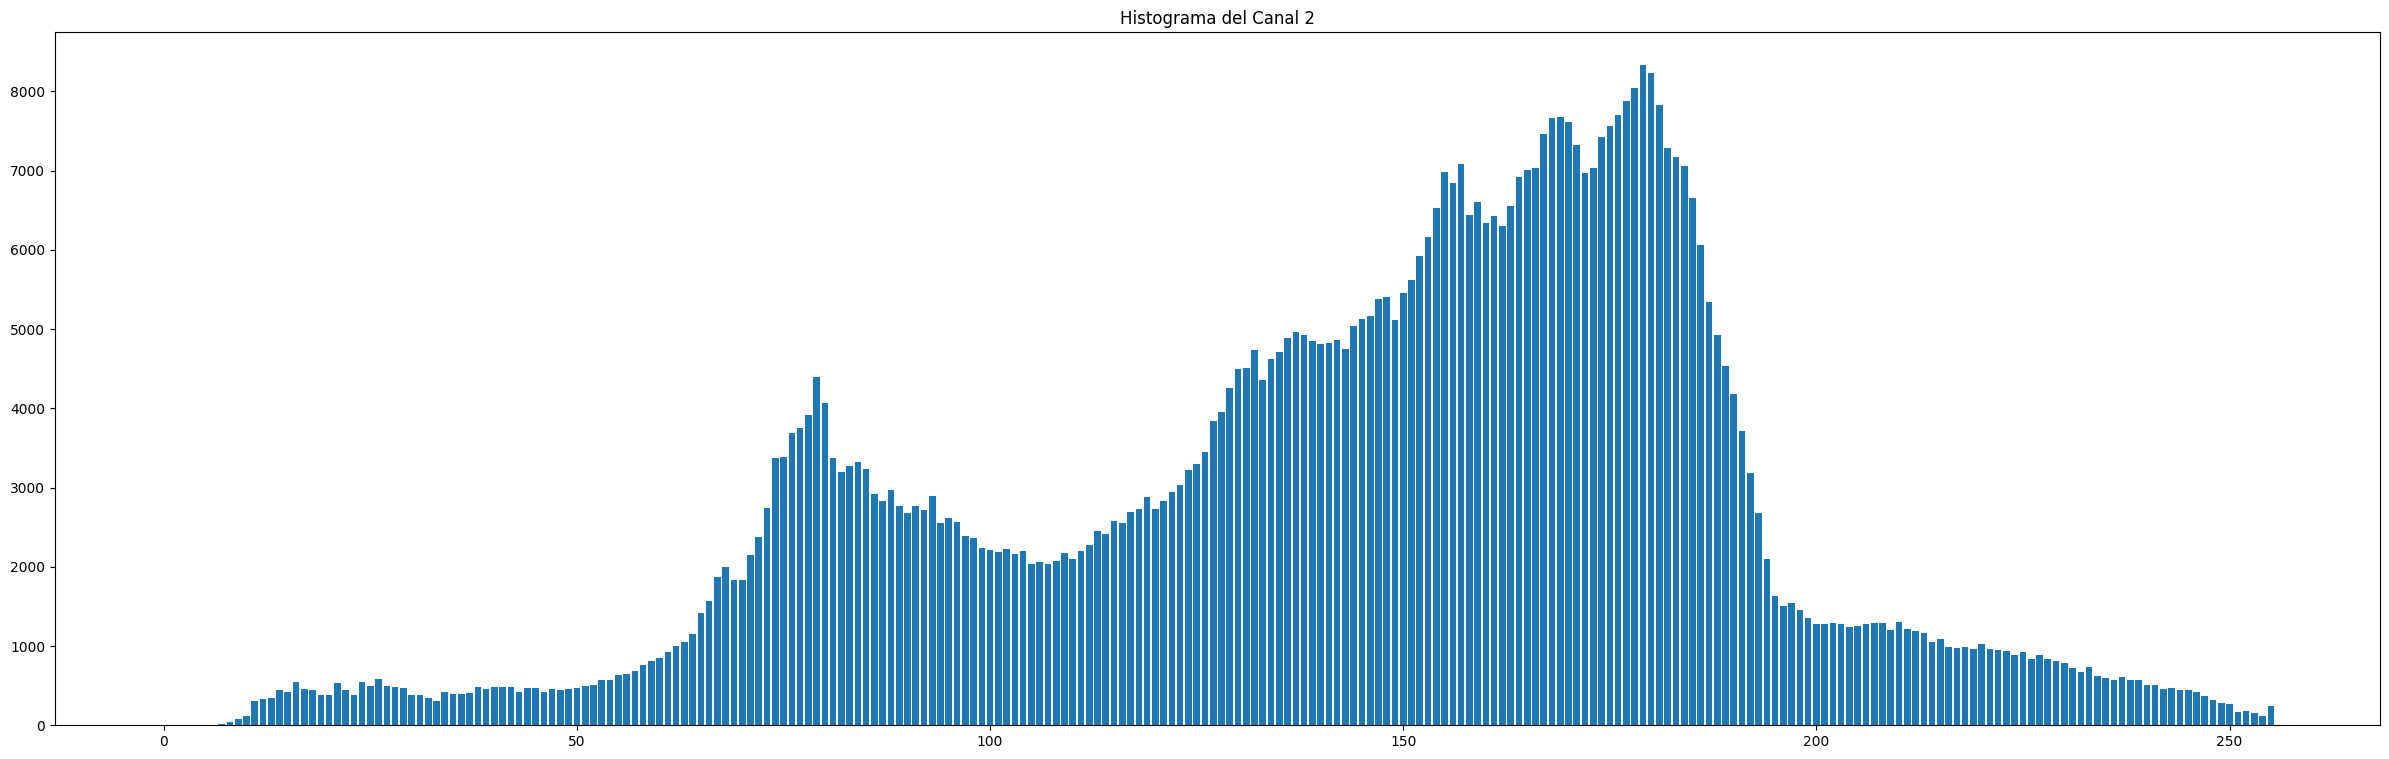

In [ ]:
def imhist3(X):
    (N, M, P) = X.shape  # Obtener dimensiones de la imagen
    n = 256  # Número de niveles de colores
    for p in range(3):  # Para cada canal de color
        h = np.zeros((256,))  # Crear un histograma vacío
        for i in range(N):  # Recorrer cada fila
            for j in range(M):  # Recorrer cada columna
                x = X[i, j, p]  # Obtener el valor del píxel
                h[x] += 1  # Incrementar el conteo en el histograma
        plt.figure(figsize=(30, 9))  # Tamaño de la figura
        plt.bar(range(n), h[0:n])  # Mostrar el histograma
        plt.title('Histograma del Canal ' + str(p))  # Título
        plt.show()  # Mostrar figura

imhist3(I)

In [ ]:
J = I.copy()  # Hacer una copia de la imagen original
J[:, :, 0] = cv2.equalizeHist(I[:, :, 0])  # Ecualizar el canal Rojo
J[:, :, 1] = cv2.equalizeHist(I[:, :, 1])  # Ecualizar el canal Verde
J[:, :, 2] = cv2.equalizeHist(I[:, :, 2])  # Ecualizar el canal Azul

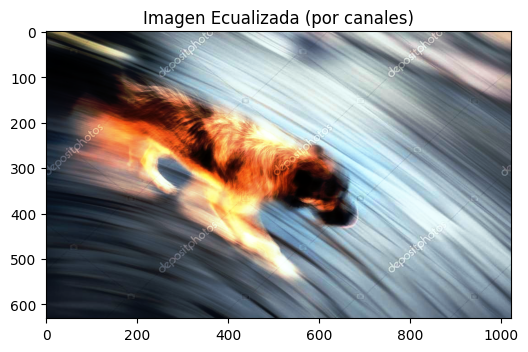

In [ ]:
plt.figure(figsize=(6, 9))  # Tamaño de la figura
plt.imshow(cv2.cvtColor(J, cv2.COLOR_BGR2RGB))  # Mostrar la imagen ecualizada
plt.title('Imagen Ecualizada (por canales)')  # Título
plt.show()  # Mostr

In [ ]:
K = I.copy()  # Hacer una copia de la imagen original
Khsv = cv2.cvtColor(K, cv2.COLOR_BGR2HSV)  # Convertir a HSV
Khsv[:, :, 2] = cv2.equalizeHist(Khsv[:, :, 2])  # Ecualizar el canal de brillo (V)
Knew = cv2.cvtColor(Khsv, cv2.COLOR_HSV2BGR)  # Convertir de nuevo a BGR

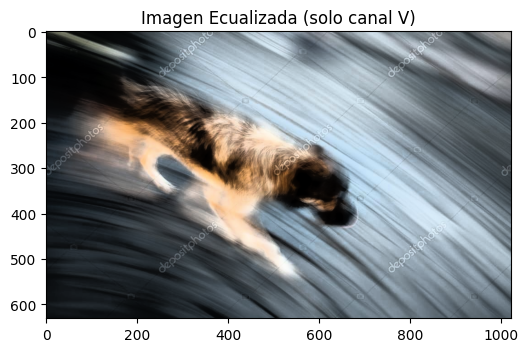

In [ ]:
plt.figure(figsize=(6, 9))  # Tamaño de la figura
plt.imshow(cv2.cvtColor(Knew, cv2.COLOR_BGR2RGB))  # Mostrar la imagen ecualizada
plt.title('Imagen Ecualizada (solo canal V)')  # Título
plt.show()  # Mostrar figura

## Procesamiento de Imagen rotada

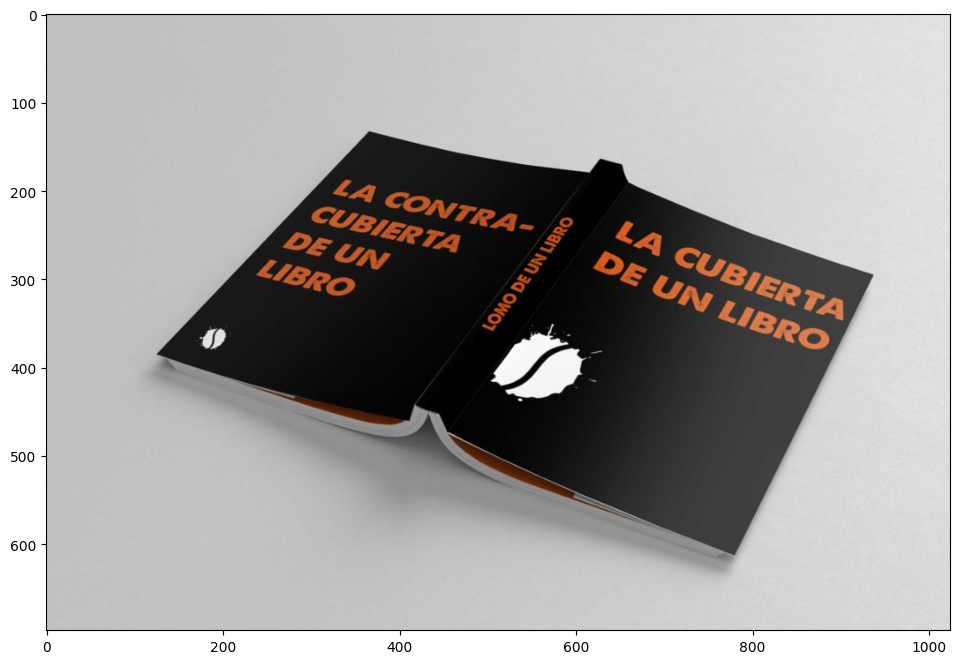

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img2 = cv2.imread('/content/dataset/imagen2.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

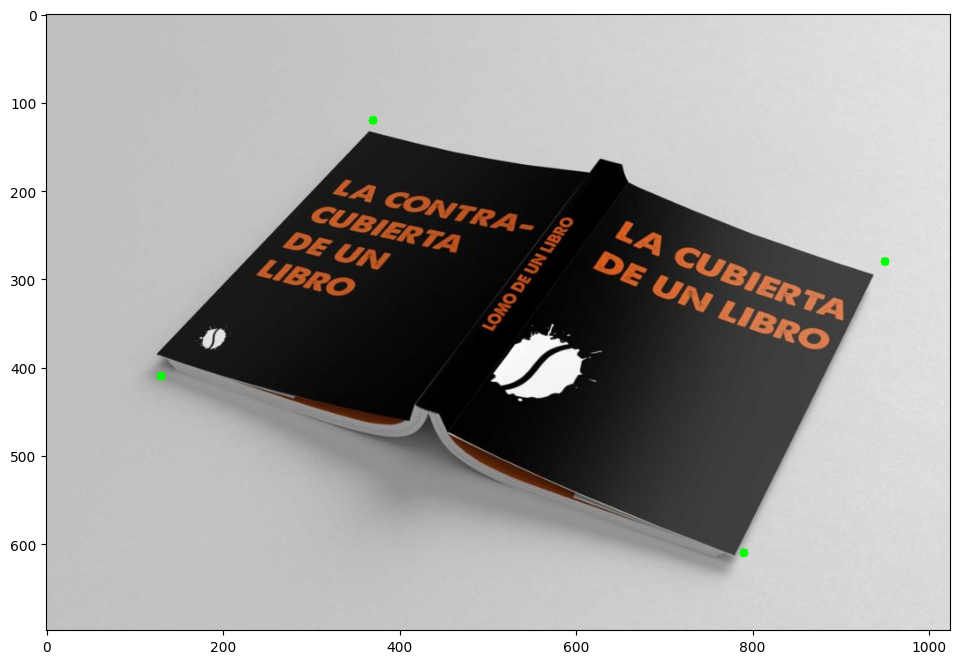

In [ ]:
# Primero coordenada x, despues coordenada y
corners = [(370, 120), # Superior izquierdo
           (950, 280), # Superior derecho
           (130, 410), # Inferior izquierdo
           (790, 610) # Inferior derecho
          ]

for x, y in corners:
    cv2.circle(img2, (x,y), radius=0, color=(0, 255, 0), thickness=10)
plt.imshow(img2);

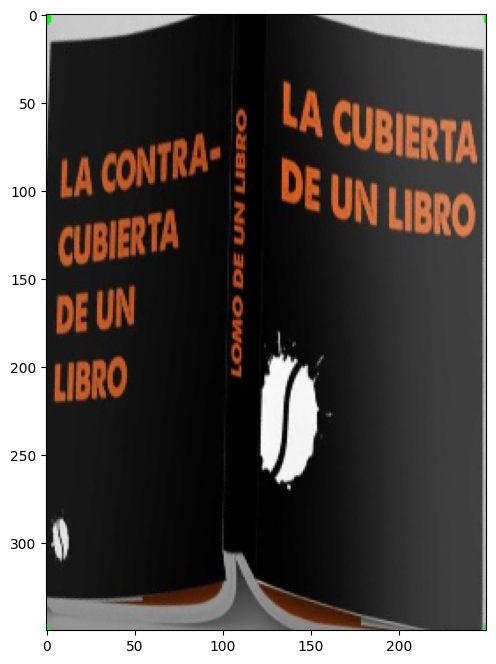

In [ ]:
w, h = 250, 350
pts1 = np.float32(corners)
# Para los puntos de destino, debe preservarse el orden de los puntos originales
pts2 = np.float32([[0, 0], [w, 0], [0, h], [w, h]])

# Obtenemos la matriz de cambio de perspectiva
matrix = cv2.getPerspectiveTransform(pts1, pts2)

# Y la aplicamos con warpPerspective
# El segundo parametro es esta matriz y el tercero debe ser una tupla con especificando (ancho, alto)
img_output = cv2.warpPerspective(img2, matrix, (w, h))
plt.imshow(img_output);

## 4.5 Resultados Finales

---

# REFLEXIÓN FINAL

## Análisis de Resultados

**¿Qué técnica fue más efectiva para cada tipo de problema?**

Para la imagen rotada lo mejor fue hacer un recorte, una extraccion y un cambio de perspectiva.
Para la imagen nitida no hizo falta hacerle un procesamiento.
Para la imagen borrosa se aplic una ecualizacion para mejorar la nitidez y contraste.

**¿Qué desafíos encontraste durante el procesamiento?**

En el procesamiento de la imagen rotada, la colocacion de coordenadas se realizo a ojo, de forma manual, lo cual es poco exacto.
En la imagen borrosa falto aplicar algun filtro mas complejo para lograr una mejor calidad de imagen.

**¿En qué casos los resultados no fueron óptimos y por qué?**

El menos optimo fue el de la imagen rotada por el hecho de tener que ubicar las coordenadas de forma manual, lo cual implica que el recorte no sea exacto y con precision.

## Aprendizaje Adquirido

**¿Qué conceptos del curso fueron más útiles?**

La ecualizacion me parecio muy interesante, si se puede ampliar y profundizar el tema se podria lograr mejorar bastante una imagen borrosa o con sombras poco legible.

**¿Cómo podrías mejorar este sistema en futuras versiones?**

Investigando sobre nuevas librerias que permitan aplicar tecnicas mas complejas a la hora de procesar imagenes.

---

## Entregables

1. Este notebook completamente ejecutado con resultados
2. Carpeta `dataset/` con tus 3 imágenes
3. Las reflexiones completadas

**Fecha de entrega:** 24 de Septiembre, 23:59

---